In [1]:
import setGPU
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["CUDA_VISIBLE_DEVICES"] = str(2)

import uproot
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
#from itertools import combinations
#from hausdorff import hausdorff_distance
import copy
import math
import keras
import glob
import sys
import datetime

setGPU: Setting GPU to: 3


Using TensorFlow backend.


In [2]:
import keras

In [20]:
%matplotlib inline

In [4]:
sys.path += ["../training"]

In [5]:
import pflow

In [6]:
with open("../training/data.npz", "rb") as fi:
    data = np.load(fi)
    data_images_in = data["data_images_in"]
    data_images_out = data["data_images_out"]

In [7]:
len(data_images_in)

9000

In [197]:
model = keras.models.load_model("../training/model_g_10.h5") 

In [198]:
pred = model.predict(data_images_in[:1000], batch_size=100)
pred2 = model.predict(data_images_in[8000:], batch_size=100)

In [199]:
import numba

In [200]:
@numba.njit
def to_list(pp_image):
    bins = [
        np.linspace(-5,5,256 + 1),
        np.linspace(-5,5,256 + 1)
    ]
    
    icand = 0
    cands = np.zeros((256*256,3), dtype=np.float32)
    for ix in range(pp_image.shape[0]):
        for iy in range(pp_image.shape[1]):
            p = pp_image[ix, iy]
            if p > 0.2:
                eta = bins[0][ix]
                phi = bins[1][iy]
                cands[icand, 0] = p
                cands[icand, 1] = eta
                cands[icand, 2] = phi
                icand += 1
    return cands[:icand]

In [201]:
def get_cands_list(pred, data_images_out):
    all_cands_ml = []
    all_cands_true = []
    num_cands_ml = []
    num_cands_true = []
    for iev in range(len(pred)):
        c1 = to_list(pred[iev, :, :, 0])
        c2 = to_list(data_images_out[iev, :, :, 0])
        all_cands_ml += [c1]
        all_cands_true += [c2]
        num_cands_ml += [len(c1)]
        num_cands_true += [len(c2)]
    all_cands_ml = np.vstack(all_cands_ml)
    all_cands_true = np.vstack(all_cands_true)
    return all_cands_ml, all_cands_true, num_cands_ml, num_cands_true

In [202]:
r1 = get_cands_list(pred, data_images_out)

In [203]:
r2 = get_cands_list(pred2, data_images_out[8000:])

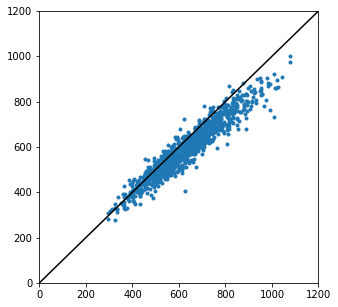

In [204]:
plt.figure(figsize=(5,5))
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.scatter(r1[3], r1[2], marker=".")
plt.plot([0,1200], [0,1200], color="black")

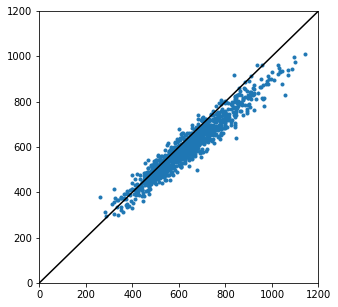

In [205]:
plt.figure(figsize=(5,5))
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.scatter(r2[3], r2[2], marker=".")
plt.plot([0,1200], [0,1200], color="black")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


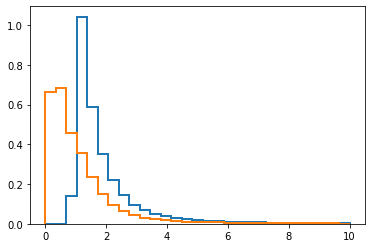

In [206]:
bins = np.linspace(0,10,30)
plt.hist([c[0] for c in r1[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[0] for c in r1[0]], bins=bins, histtype="step", lw=2, normed=True);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


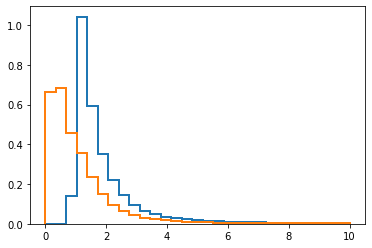

In [207]:
bins = np.linspace(0,10,30)
plt.hist([c[0] for c in r2[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[0] for c in r2[0]], bins=bins, histtype="step", lw=2, normed=True);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


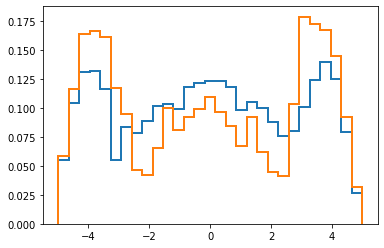

In [208]:
bins = np.linspace(-5, 5, 30)
plt.hist([c[1] for c in r1[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[1] for c in r1[0]], bins=bins, histtype="step", lw=2, normed=True);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


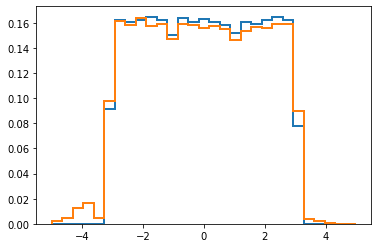

In [209]:
bins = np.linspace(-5,5,30)
plt.hist([c[2] for c in r1[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[2] for c in r1[0]], bins=bins, histtype="step", lw=2, normed=True);

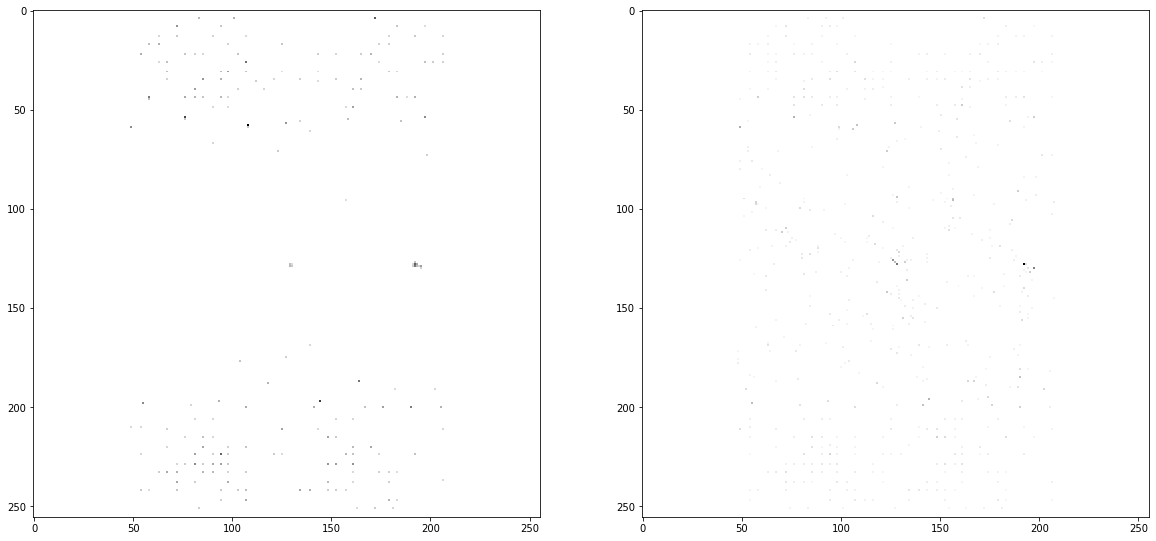

In [217]:
iev = 4
pp = pred2[iev, :, :, 0]
pp[pp<1] = 0

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(pp, cmap="binary", interpolation=None)

plt.subplot(1,2,2)
plt.imshow(data_images_out[8000+iev, :, :, 0], cmap="binary", interpolation=None)


In [2]:
def get_index_triu_vector(i, j, vecsize):
    k = j - i - 1
    k += i*vecsize
    missing = int(i*(i+1)/2)
    k -= missing
    return k

In [3]:
fn = "/Users/joosep/Documents/caltech/pfvalidation/out.root"
fi = uproot.open(fn)
tree = fi.get("pftree")
data = tree.arrays(tree.keys())
data = {str(k, 'ascii'): v for k, v in data.items()}

In [22]:
len(data["nclusters"])

10

Text(0.5,0,'number of objects')

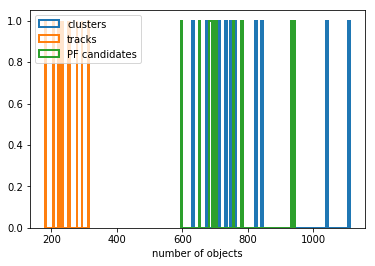

In [23]:
plt.hist(data["nclusters"], bins=100, histtype="step", lw=2, label="clusters");
plt.hist(data["ntracks"], bins=100, histtype="step", lw=2, label="tracks");
plt.hist(data["npfcands"], bins=100, histtype="step", lw=2, label="PF candidates");
plt.legend(loc="best")
plt.xlabel("number of objects")

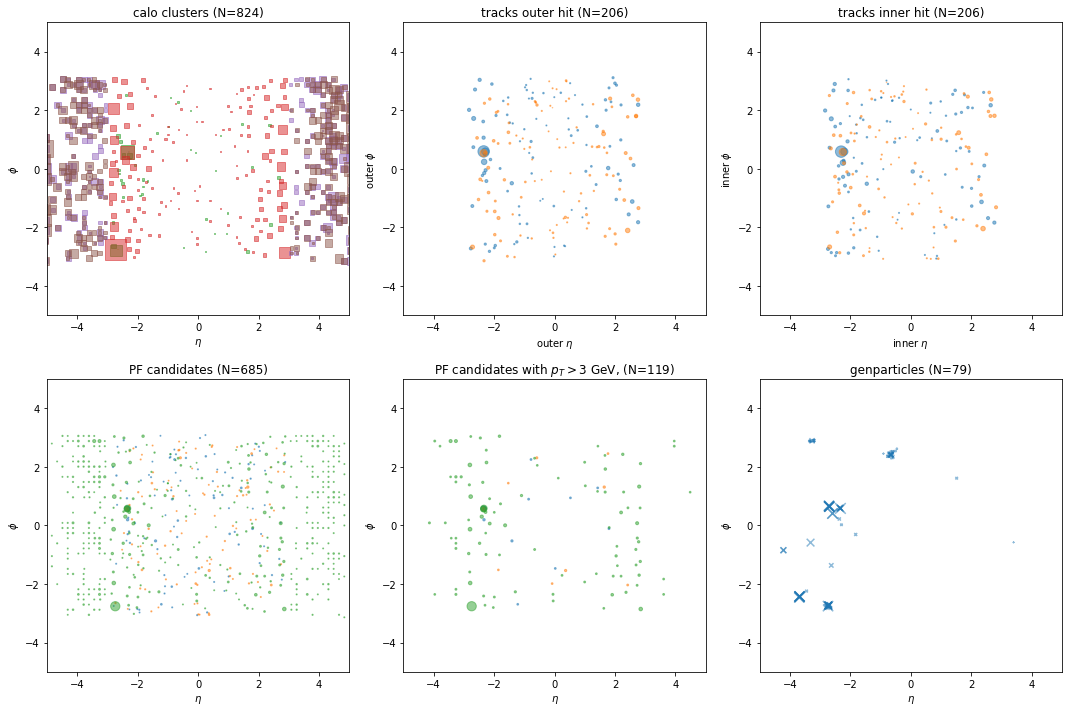

In [24]:
#Event number to plot
i = 2

c_eta = data["clusters_eta"]
c_phi = data["clusters_phi"]
c_en = data["clusters_energy"]
c_type = data["clusters_type"]

t_o_eta = data["tracks_outer_eta"]
t_o_phi = data["tracks_outer_phi"]
t_i_eta = data["tracks_inner_eta"]
t_i_phi = data["tracks_inner_phi"]
t_q = np.sign(data["tracks_qoverp"])
t_en = 1.0/np.abs(data["tracks_qoverp"])

pfcand_ptcut = 3
cand_eta = data["pfcands_eta"]
cand_phi = data["pfcands_phi"]
cand_en = data["pfcands_pt"]
cand_charge = data["pfcands_charge"]

g_eta = data["genparticles_eta"]
g_phi = data["genparticles_phi"]
g_en = data["genparticles_pt"]

plt.figure(figsize=(15,10))

ax = plt.subplot(2,3,1)
for ct in [2,3,4,5,8,9,11]:
    cluster_type_sel = c_type[i]==ct
    plt.scatter(
        c_eta[i][cluster_type_sel],
        c_phi[i][cluster_type_sel],
        s=c_en[i][cluster_type_sel],
        marker="s", alpha=0.5, label="{0}".format(ct))
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.title("calo clusters (N={0})".format(len(c_eta[i])))
plt.xlim(-5,5)
plt.ylim(-5,5)
#plt.legend(loc="best", ncol=2)

ax = plt.subplot(2,3,2)
for track_charge in [-1, 1]:
    track_charge_sel = t_q[i] == track_charge
    plt.scatter(t_o_eta[i][track_charge_sel], t_o_phi[i][track_charge_sel], s=t_en[i][track_charge_sel], marker="o", alpha=0.5)
plt.xlabel("outer $\eta$")
plt.ylabel("outer $\phi$")
plt.title("tracks outer hit (N={0})".format(len(t_o_eta[i])))
plt.xlim(-5,5)
plt.ylim(-5,5)

ax = plt.subplot(2,3,3)
for track_charge in [-1, 1]:
    track_charge_sel = t_q[i] == track_charge
    plt.scatter(t_i_eta[i][track_charge_sel], t_i_phi[i][track_charge_sel], s=t_en[i][track_charge_sel], marker="o", alpha=0.5)
plt.xlabel("inner $\eta$")
plt.ylabel("inner $\phi$")
plt.title("tracks inner hit (N={0})".format(len(t_o_eta[i])))
plt.xlim(-5,5)
plt.ylim(-5,5)

ax = plt.subplot(2,3,4)
for _cand_charge in [-1, 1, 0]:
    cand_charge_sel = cand_charge[i] == _cand_charge
    plt.scatter(cand_eta[i][cand_charge_sel], cand_phi[i][cand_charge_sel], s=cand_en[i][cand_charge_sel], marker="o", alpha=0.5)
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.title("PF candidates (N={0})".format(len(cand_eta[i])))
plt.xlim(-5,5)
plt.ylim(-5,5)

ax = plt.subplot(2,3,5)
cand_pt_sel = (cand_en[i] > pfcand_ptcut)
for _cand_charge in [-1, 1, 0]:
    cand_charge_sel = (cand_charge[i] == _cand_charge) & (cand_pt_sel)
    plt.scatter(
        cand_eta[i][cand_charge_sel],
        cand_phi[i][cand_charge_sel],
        s=cand_en[i][cand_charge_sel], marker="o", alpha=0.5)
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.title("PF candidates with $p_T > {0}$ GeV, (N={1})".format(pfcand_ptcut, len(cand_eta[i][cand_pt_sel])))
plt.xlim(-5,5)
plt.ylim(-5,5)

ax = plt.subplot(2,3,6)
plt.scatter(g_eta[i], g_phi[i], s=g_en[i], marker="x", alpha=0.5)
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.title("genparticles (N={0})".format(len(g_eta[i])))

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.tight_layout()

In [25]:
from collections import Counter

In [26]:
all_blocks_counts_0 = []
all_blocks_counts_1 = []
all_blocks_counts_2 = []
all_blocks_counts_3 = []

for iev in range(len(data["clusters_iblock"])):
    bls = list(data["clusters_iblock"][iev])
    bls2 = list(data["tracks_iblock"][iev])
    bls_counts = sorted([v for k, v in Counter(bls+bls2).items()], reverse=True)
    all_blocks_counts_0 += [bls_counts[0]]
    all_blocks_counts_1 += [bls_counts[1]]
    all_blocks_counts_2 += [bls_counts[2]]
    all_blocks_counts_3 += [bls_counts[3]]

In [27]:
len(np.unique(list(data["clusters_iblock"][iev]) + list(data["tracks_iblock"][iev])))

761

Text(0.5,0,'elements per block')

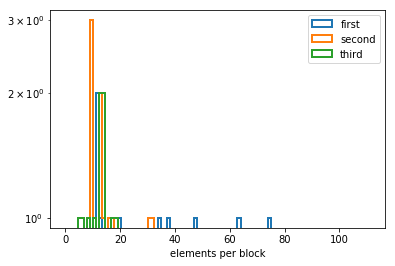

In [28]:
bins = np.linspace(0,1.5*max(all_blocks_counts_0), 100)
plt.hist(all_blocks_counts_0, bins=bins, histtype="step", lw=2, label="first")
plt.hist(all_blocks_counts_1, bins=bins, histtype="step", lw=2, label="second")
plt.hist(all_blocks_counts_2, bins=bins, histtype="step", lw=2, label="third")

plt.yscale("log")
plt.legend(loc="best")
plt.xlabel("elements per block")

In [29]:
tree2 = fi.get("linktree")
linkdata = tree2.arrays(tree2.keys())
linkdata = {str(k, 'ascii'): v for k, v in linkdata.items()}

In [30]:
pfgraph = nx.Graph()
iev = 2

items_block = {}
node_pos = {}
node_colors = {}
node_sizes = {}
node_types = {}

cluster_colors = {
    3: "blue",
    2: "blue",
    5: "red",
    4: "green",
    8: "orange",
    9: "orange",
    11: "purple",
}

for icluster, iblock in enumerate(data["clusters_iblock"][iev]):
    this = (iblock, data["clusters_ielem"][iev][icluster])
    pfgraph.add_node(this)
    
    node_pos[this] = (data["clusters_eta"][iev][icluster], data["clusters_phi"][iev][icluster])
    tp = data["clusters_type"][iev][icluster]
    node_colors[this] = cluster_colors[tp]
    node_sizes[this] = data["clusters_energy"][iev][icluster]
    if not iblock in items_block.keys():
        items_block[iblock] = []
    items_block[iblock] += [this]
    node_types[this] = tp
    
for itrack, iblock in enumerate(data["tracks_iblock"][iev]):
    this = (iblock, data["tracks_ielem"][iev][itrack])
    pfgraph.add_node(this)
    
    p = abs(data["tracks_qoverp"][iev][itrack])
    eta = data["tracks_outer_eta"][iev][itrack]
    phi = data["tracks_outer_phi"][iev][itrack]
    node_pos[this] = (
        eta, phi
    )
    node_colors[this] = "black"
    node_sizes[this] = 10*p
    node_types[this] = 0

    if not iblock in items_block.keys():
        items_block[iblock] = []
    items_block[iblock] += [this]
    
for iblock, items in items_block.items():
    for comb in combinations(items, 2):
        pfgraph.add_edge(comb[0], comb[1])

Text(0,0.5,'$\\phi$')

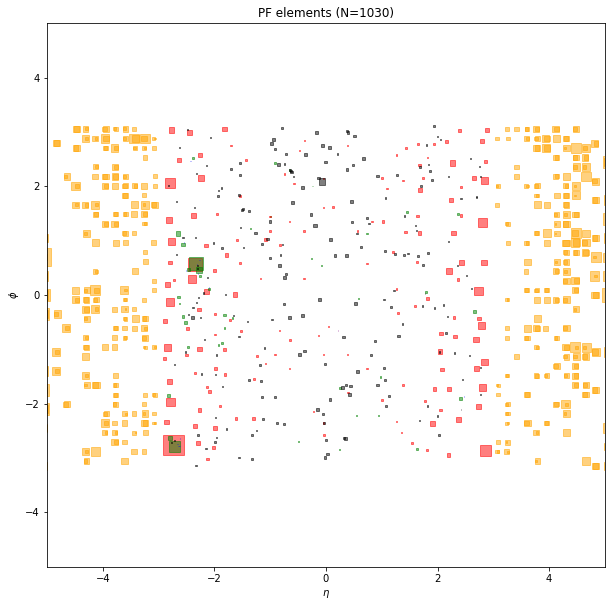

In [31]:
plt.figure(figsize=(10, 10))
plt.xlim(-5,5)
plt.ylim(-5,5)
nx.draw(pfgraph,
        pos=node_pos,
        node_size=[node_sizes[n] for n in pfgraph.nodes],
        node_color=[node_colors[n] for n in pfgraph.nodes],
        edgelist=[],
        node_shape="s",
        alpha=0.5, width=0.05
)
plt.title("PF elements (N={0})".format(len(pfgraph.nodes)))
plt.axis('on')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")

Text(0,0.5,'$\\phi$')

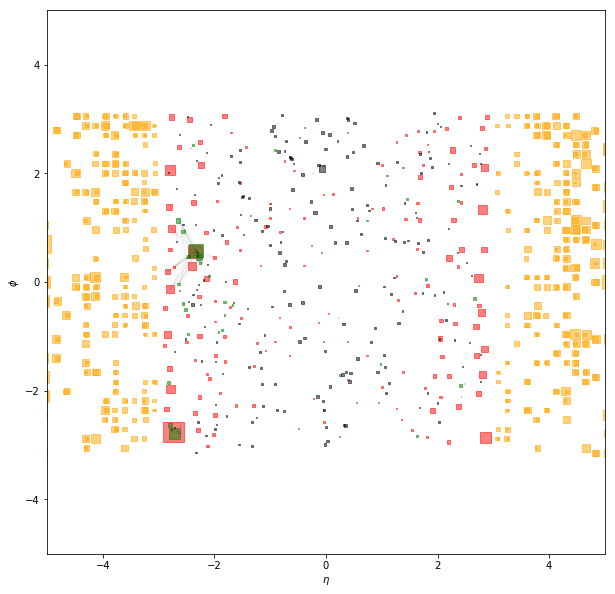

In [32]:
plt.figure(figsize=(10, 10))
plt.xlim(-5,5)
plt.ylim(-5,5)
nx.draw(pfgraph,
        pos=node_pos,
        node_size=[node_sizes[n] for n in pfgraph.nodes],
        node_color=[node_colors[n] for n in pfgraph.nodes],
        node_shape="s",
        alpha=0.5, width=0.001
)
#plt.xticks(np.arange(-5,5,0.3))
#plt.yticks(np.arange(-5,5,0.3))

#plt.grid()
# plt.xlabel("cluster x / scaled track px")
# plt.ylabel("cluster y / scaled track px")
# plt.title("PF elements with blocks")
plt.axis('on')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")

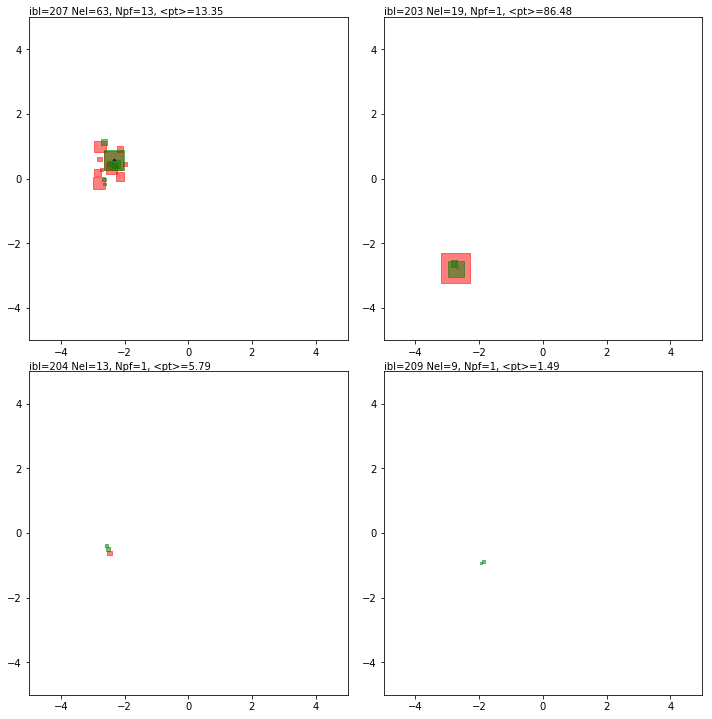

In [33]:
biggest_clusters = sorted([
    (k, items_block[k]) for k in items_block.keys()], reverse=True, key=lambda x: len(x[1])
)[:4]

plt.figure(figsize=(10, 10))
iplot = 1

subs = []
for iblock, elems in biggest_clusters:
    nelem = len(elems)
    
    sub = nx.Graph()
    sub.add_nodes_from(items_block[iblock])
    
    n = linkdata["linkdata_nelem"][iev][linkdata["linkdata_iblock"][iev] == iblock]
    ks = linkdata["linkdata_k"][iev][linkdata["linkdata_iblock"][iev] == iblock]
    dists = linkdata["linkdata_distance"][iev][linkdata["linkdata_iblock"][iev] == iblock]
    kdict = {k: i for i, k in enumerate(ks)}

    vecsize = n[0]
    inds = np.triu_indices(n=vecsize, m=vecsize, k=0.1)
    inds2 = [get_index_triu_vector(i, j, vecsize) for i, j in zip(inds[0], inds[1])]
    for i, ind2 in enumerate(inds2):
        if ind2 in kdict.keys():
            idx_triu_i = inds[0][i]
            idx_triu_j = inds[1][i]
            if idx_triu_j > idx_triu_i:
                tmp = idx_triu_i
                idx_triu_i = idx_triu_j
                idx_triu_j = tmp
            u = (iblock, idx_triu_i)
            v = (iblock, idx_triu_j)
            if u in sub.nodes and v in sub.nodes:
                sub.add_edge(u, v, weight=dists[kdict[ind2]])
    subs += [sub]
    
    ax = plt.subplot(2,2,iplot)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    nx.draw(sub,
            pos=node_pos,
            node_size=[2*node_sizes[n] for n in sub.nodes],
            node_color=[node_colors[n] for n in sub.nodes],
            node_shape="s",
            alpha=0.5, width=0.05, ax=ax
    )
    
    pfcand_inds = (data["pfcands_iblock"][iev] == iblock)
    pf_pt = data["pfcands_pt"][iev][pfcand_inds]
    pf_phi = data["pfcands_phi"][iev][pfcand_inds]
    
    plt.text(0.0, 1.0,
        "ibl={0} Nel={1}, Npf={2}, <pt>={3:.2f}".format(
            iblock, nelem, len(pf_pt), np.mean(pf_pt)),
            transform=ax.transAxes, verticalalignment="bottom")
#     pf_x = 5*pf_pt * np.cos(pf_phi)
#     pf_y = 5*pf_pt * np.sin(pf_phi)
    
#     for ipf in range(len(pf_x)):
#         plt.plot([0, pf_x[ipf]], [0, pf_y[ipf]], color="blue")
    plt.axis('on')
    iplot += 1
    
plt.tight_layout()

In [34]:
iev = 3
track_outer_eta = data["tracks_outer_eta"][iev]
track_outer_phi = data["tracks_outer_phi"][iev]

track_inner_eta = data["tracks_inner_eta"][iev]
track_inner_phi = data["tracks_inner_phi"][iev]

cl_ecal = data["clusters_type"][iev] == 4
cl_ecal_eta = data["clusters_eta"][iev][cl_ecal]
cl_ecal_phi = data["clusters_phi"][iev][cl_ecal]

cl_hcal = data["clusters_type"][iev] == 5
cl_hcal_eta = data["clusters_eta"][iev][cl_hcal]
cl_hcal_phi = data["clusters_phi"][iev][cl_hcal]

cl_hf = data["clusters_type"][iev] >= 8
cl_hf_eta = data["clusters_eta"][iev][cl_hf]
cl_hf_phi = data["clusters_phi"][iev][cl_hf]

(-5, 5)

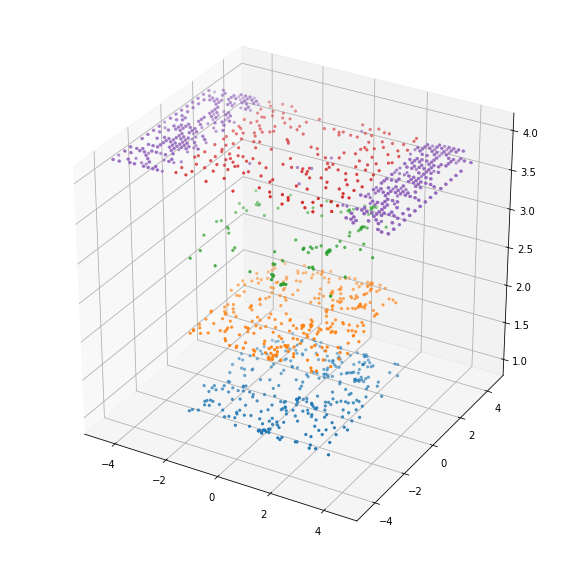

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(track_inner_eta, track_inner_phi, 1, marker=".")
ax.scatter3D(track_outer_eta, track_outer_phi, 2, marker=".")
ax.scatter3D(cl_ecal_eta, cl_ecal_phi, 3, marker=".")
ax.scatter3D(cl_hcal_eta, cl_hcal_phi, 4, marker=".")
ax.scatter3D(cl_hf_eta, cl_hf_phi, 4, marker=".")

plt.xlim(-5,5)
plt.ylim(-5,5)